### Data Preparation

First, let's prepare a sample time series dataset.



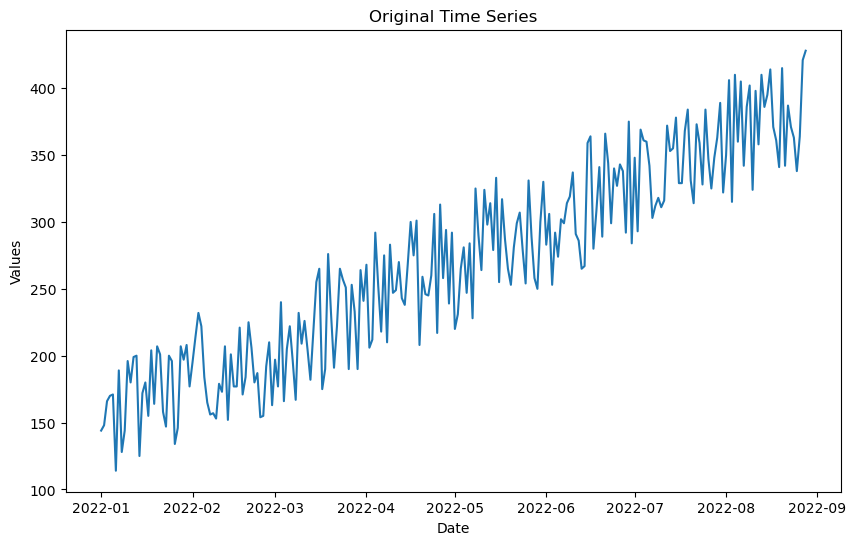

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Create a sample time series dataset
np.random.seed(0)
date_range = pd.date_range('2022-01-01', periods=240, freq='D')
values = np.random.randint(100, 200, size=240) + np.arange(240)
df = pd.DataFrame(values, index=date_range, columns=['Values'])

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()



### 1. Moving Average Smoothing

Moving average smoothing involves calculating the average of a fixed-size window of values to smooth out the time series.



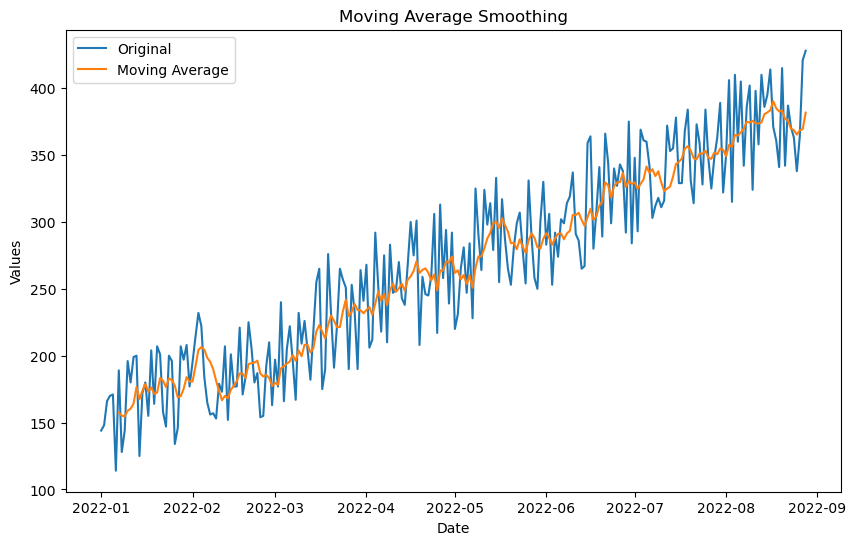

In [22]:
# Calculate moving average with a window size of 7
df['Moving Average'] = df['Values'].rolling(window=7).mean()

# Plot the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Original')
plt.plot(df.index, df['Moving Average'], label='Moving Average')
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


 
### 2. Simple Exponential Smoothing (SES)

Simple exponential smoothing involves calculating a weighted average of past values, with more recent values given more weight.


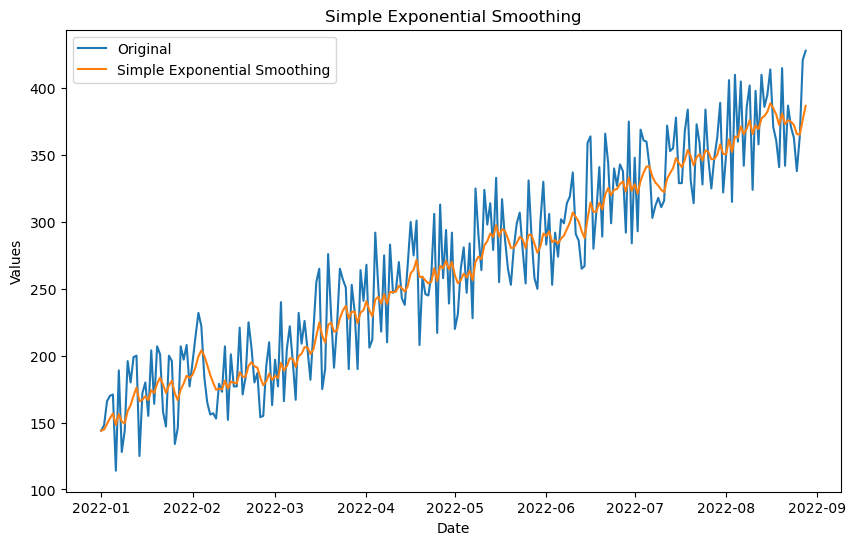

In [23]:

# Calculate simple exponential smoothing with an alpha of 0.2
df['SES'] = df['Values'].ewm(alpha=0.2, adjust=False).mean()

# Plot the simple exponential smoothing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Original')
plt.plot(df.index, df['SES'], label='Simple Exponential Smoothing')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()




### 3. Holt's Linear Trend Smoothing

Holt's linear trend smoothing involves calculating a weighted average of past values, with more recent values given more weight, and also takes into account the trend of the time series.



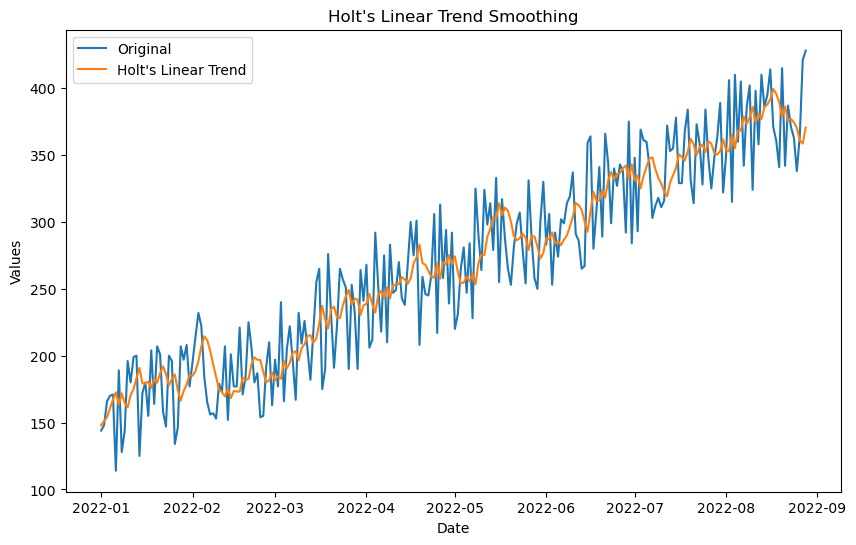

In [24]:
from statsmodels.tsa.holtwinters import Holt

# Apply Holt's linear trend smoothing
holt_model = Holt(df['Values']).fit(smoothing_level=0.2, smoothing_trend=0.2)
df['Holt Linear Trend'] = holt_model.fittedvalues

# Plot the Holt's linear trend smoothing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Original')
plt.plot(df.index, df['Holt Linear Trend'], label="Holt's Linear Trend")
plt.title("Holt's Linear Trend Smoothing")
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


### 4. Damped Smoothing

Damped smoothing is similar to Holt's linear trend smoothing, but it also takes into account the damping factor, which reduces the effect of the trend over time.



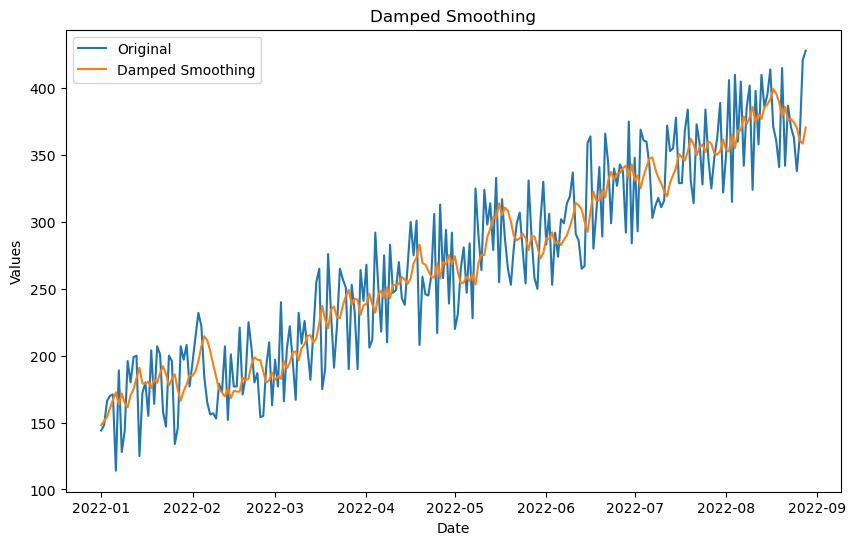

In [25]:
from statsmodels.tsa.holtwinters import Holt

# Apply Damped Smoothing with alpha=0.2, beta=0.2, and phi=0.8
damped_model = Holt(df['Values']).fit(smoothing_level=0.2, smoothing_trend=0.2, damping_trend=0.8)
df['Damped Smoothing'] = damped_model.fittedvalues

# Plot the Damped Smoothing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Original')
plt.plot(df.index, df['Damped Smoothing'], label='Damped Smoothing')
plt.title('Damped Smoothing')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


### 5. Holt-Winters Method

The Holt-Winters method is a seasonal decomposition method that takes into account the trend, seasonality, and residuals of the time series.

`Note:` that the Holt-Winters method requires a seasonal period to be specified, which can be determined by analyzing the time series data.


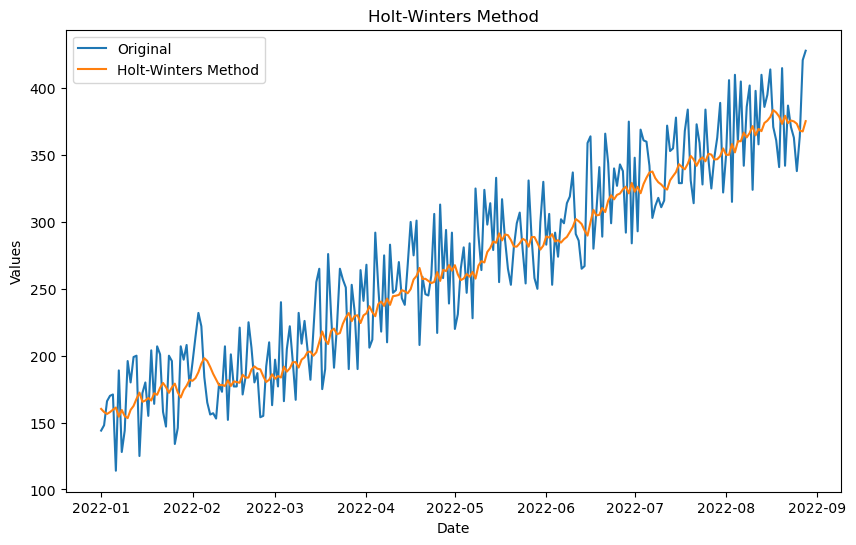

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Calculate Holt-Winters method with a seasonal period of 30
model = ExponentialSmoothing(df['Values'], seasonal_periods=30)
model_fit = model.fit()

# Plot the Holt-Winters method
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Values'], label='Original')
plt.plot(df.index, model_fit.fittedvalues, label='Holt-Winters Method')
plt.title('Holt-Winters Method')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()
 
